In [1]:
# 1. 导入必要的库
from sklearn.datasets import load_iris
import pandas as pd
import os

# 2. 创建data子目录（如果不存在则创建，避免目录不存在报错）
data_dir = "./data"  # 当前目录下的data子目录
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.to_csv(os.path.join(data_dir,'iris.csv'),index=False)

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# 检查是否有空缺值
# 针对每个column进行检查
missing_values = df.isnull().sum()
print(missing_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
# 填充缺失值，使用均值填充
df_fill_meidan=df.fillna(df.median(numeric_only=True))

In [7]:
features=df.iloc[:,0:4]
labels=df.iloc[:,4]
print(features.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


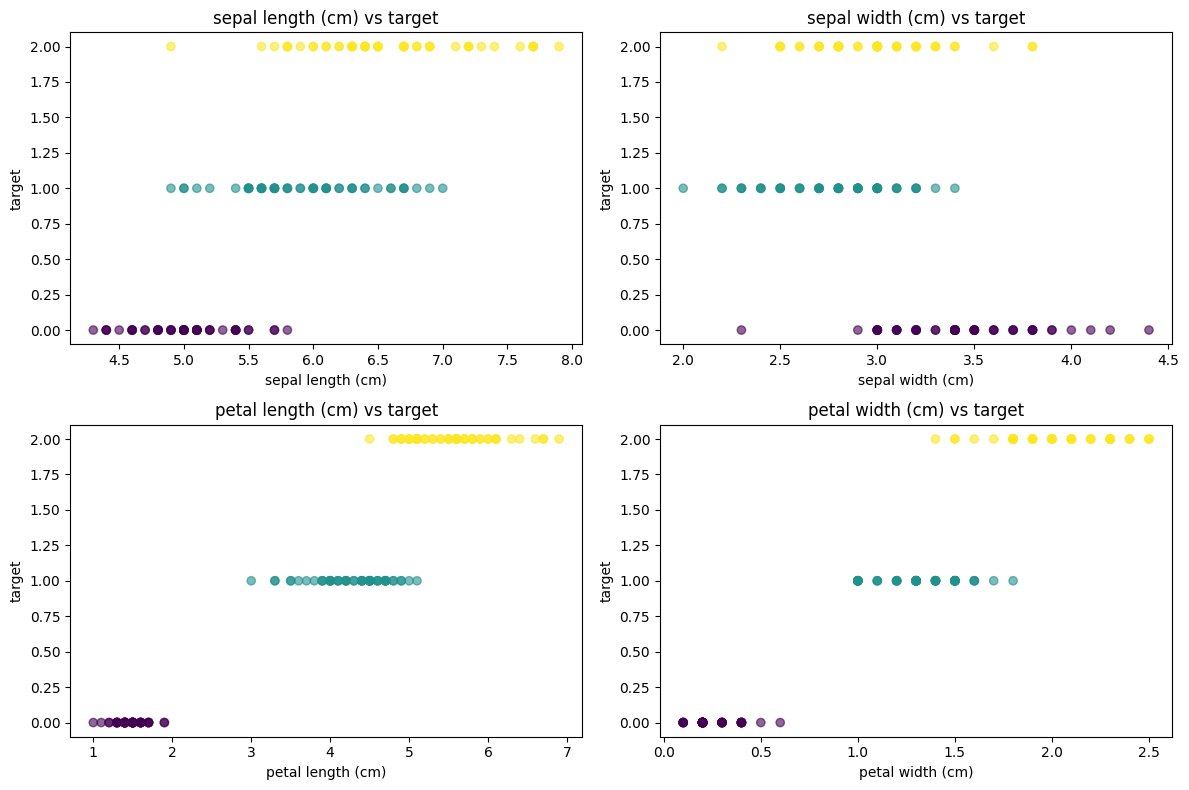

In [ ]:
import matplotlib.pyplot as plt

# 子图语法示例：fig, axes = plt.subplots(n_rows, n_cols, figsize=(w, h))
# 返回的 axes 是一个二维数组/展平列表，可用 axes[i] 来指向具体子图。
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# 将 axes 从二维数组变为一维列表，方便后续遍历
axes = axes.ravel()  # 将二维数组变为一维列表

for idx, feature in enumerate(features.columns):
    ax = axes[idx]#axes[idx] 指向当前子图，ax 是一个 pyplot.Axes 对象
    scatter = ax.scatter(
        x=df[feature],
        y=df['target'],
        c=df['target'],#颜色
        cmap='viridis',#颜色映射
        marker='o',#点的形状
        alpha=0.6#透明度
    )
    ax.set_title(f'{feature} vs target')#设置标题
    ax.set_xlabel(feature)#设置x轴标签
    ax.set_ylabel('target')#设置y轴标签

plt.tight_layout()#自动调整子图参数，使之填充整个图像区域
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
df_classifier=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=43)
df_classifier.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=43)

In [30]:
y_pred=df_classifier.predict(x_test)


In [31]:
print(y_test[:30])
print(y_pred[:30])

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [32]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.9666666666666667


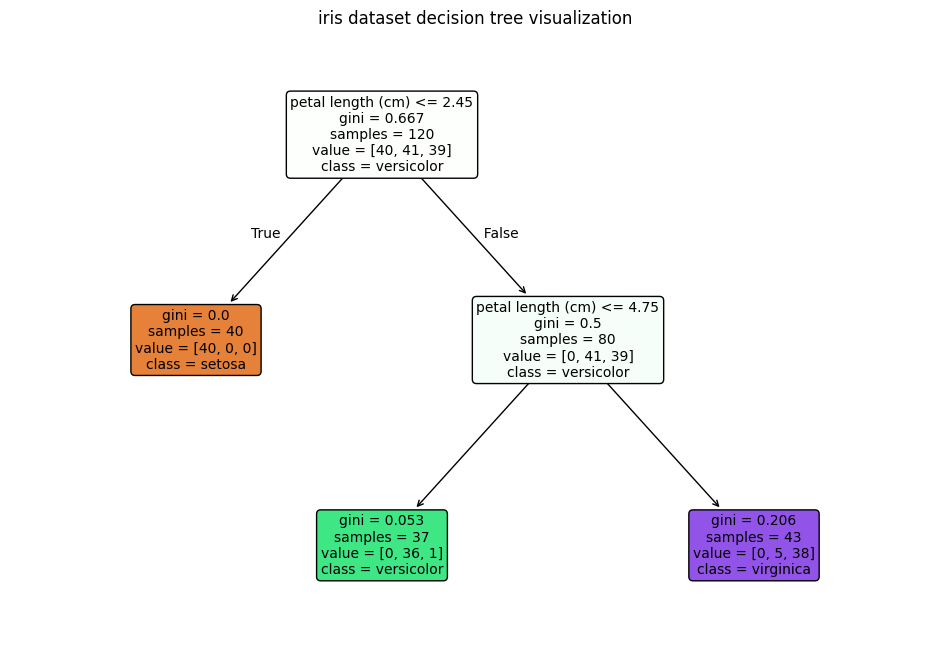

In [33]:
plt.figure(figsize=(12,8))
tree.plot_tree(df_classifier,
feature_names=iris.feature_names,
class_names=iris.target_names,
filled=True,
rounded=True,
fontsize=10)
plt.title("iris dataset decision tree visualization")
plt.savefig("iris_decision_tree.png")
plt.show()